In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 100% !important; }</style>"))
import matplotlib.pyplot as plt
import matplotx
plt.style.use(matplotx.styles.dracula)
plt.rcParams['figure.figsize'] = [20, 6]

In [173]:
X_train.columns

Index(['thalach', 'oldpeak', 'ca', 'cp', 'exang', 'chol', 'age', 'trestbps',
       'slope', 'sex', 'thal'],
      dtype='object')

### Heart Disease Prediction<br><hr>
**Attributes:**
1 - age: age in years<br>
2 - sex: sex (1 = male; 0 = female)<br>
3 - cp: chest pain type<br>
        -- Value 0: typical angina<br>
        -- Value 1: atypical angina<br>
        -- Value 2: non-anginal pain<br>
        -- Value 3: asymptomatic<br>
4 - trestbps: resting blood pressure (in mm Hg on admission to the hospital)<br>
5 - chol: serum cholestoral in mg/dl<br>
6 - fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)<br>
7 - restecg: resting electrocardiographic results<br>
        -- Value 0: normal<br>
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes criteria <br>
8 - thalach: maximum heart rate achieved<br>
9 - exang: exercise induced angina (1 = yes; 0 = no)<br>
10 - oldpeak = ST depression induced by exercise relative to rest<br>
11 - slope: the slope of the peak exercise ST segment<br>
        -- Value 0: upsloping<br>
        -- Value 1: flat<br>
        -- Value 2: downsloping<br>
12 - ca: number of major vessels (0-3) colored by flourosopy<br>
13 - thal: 1 = normal; 2 = fixed defect; 3 = reversable defect<br>
14 - target : 0 : Negative ; 1 : Positive

In [186]:
import pandas as pd
import seaborn as sns
import numpy as np
from classes.gen_helper import (EDA , FeatureEngineering, ModelTraining, Model_Finder)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from imblearn.over_sampling import RandomOverSampler
import pickle
import os 

#ML Algothrims
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                              AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier)
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import lightgbm as lgbm
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, make_scorer
import gzip 

In [180]:
df = pd.read_csv("./data/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [179]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
#Check if the any column is having the ZERO std
data_described = df.describe()
for i in df.columns:
    print(i , data_described[i]['std'])

age 9.082100989837857
sex 0.46601082333962385
cp 1.0320524894832985
trestbps 17.5381428135171
chol 51.83075098793003
fbs 0.35619787492797644
restecg 0.525859596359298
thalach 22.905161114914094
exang 0.4697944645223165
oldpeak 1.1610750220686348
slope 0.6162261453459619
ca 1.022606364969327
thal 0.6122765072781409
target 0.4988347841643913


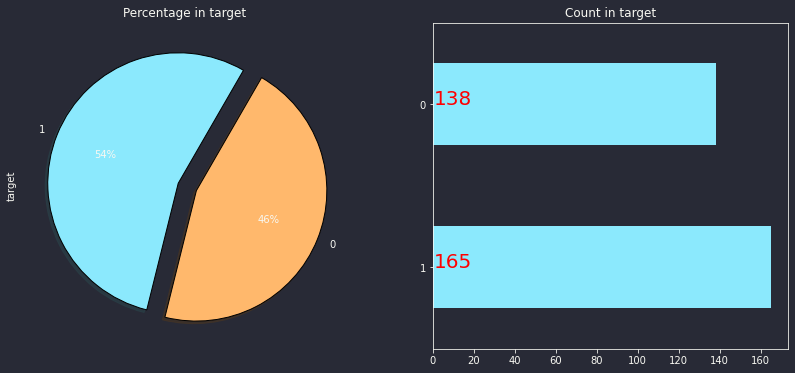

In [7]:
eda = EDA(df)
eda.plot_pie(target='target')

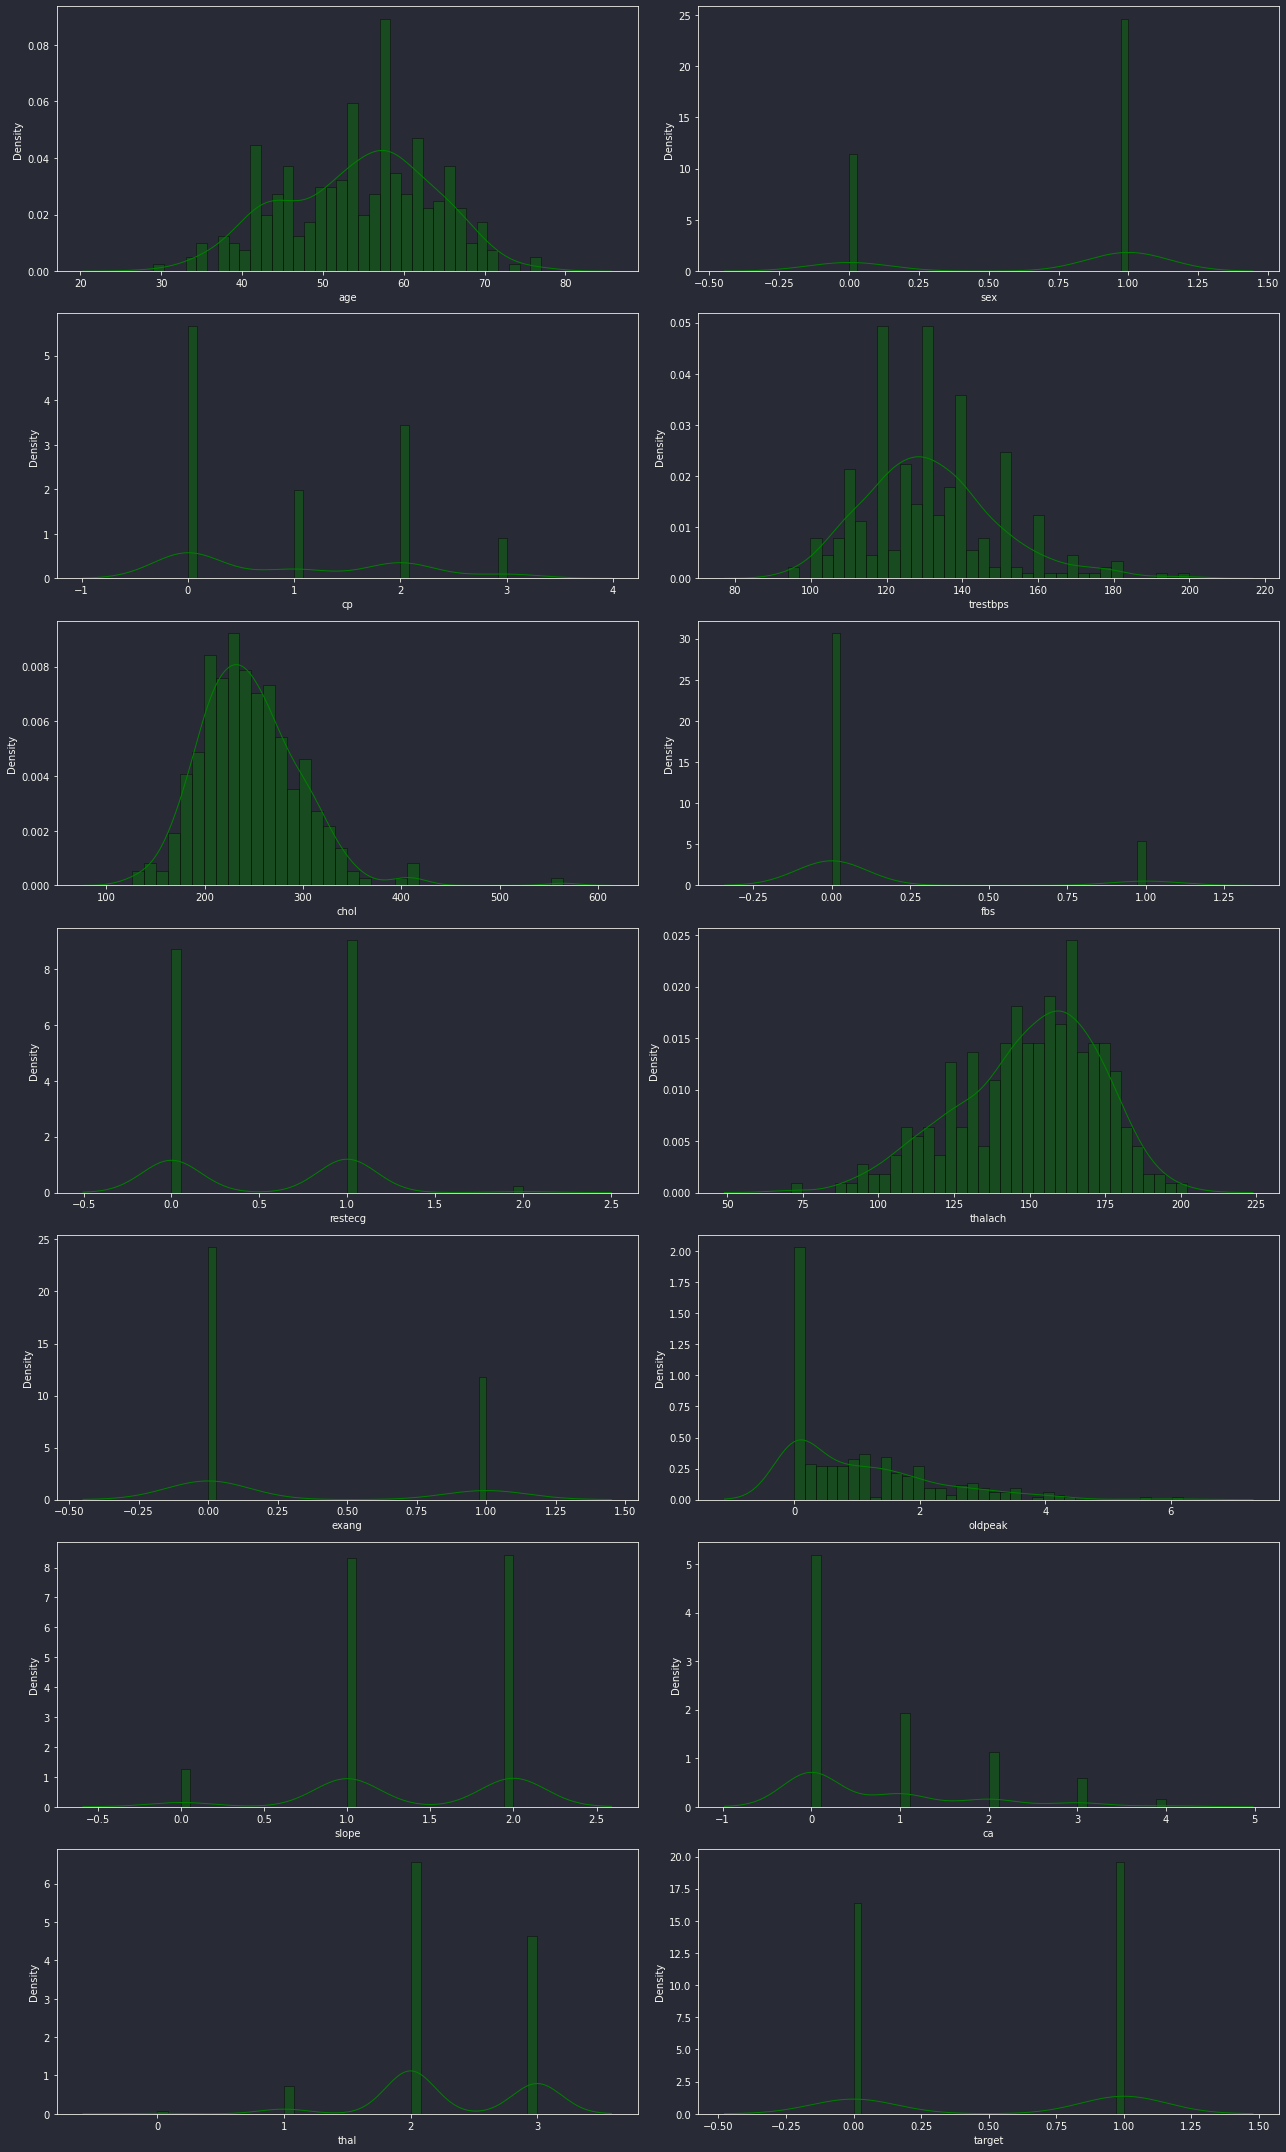

In [9]:
eda.plot_histogram(df, columns=2, fig_height=30)

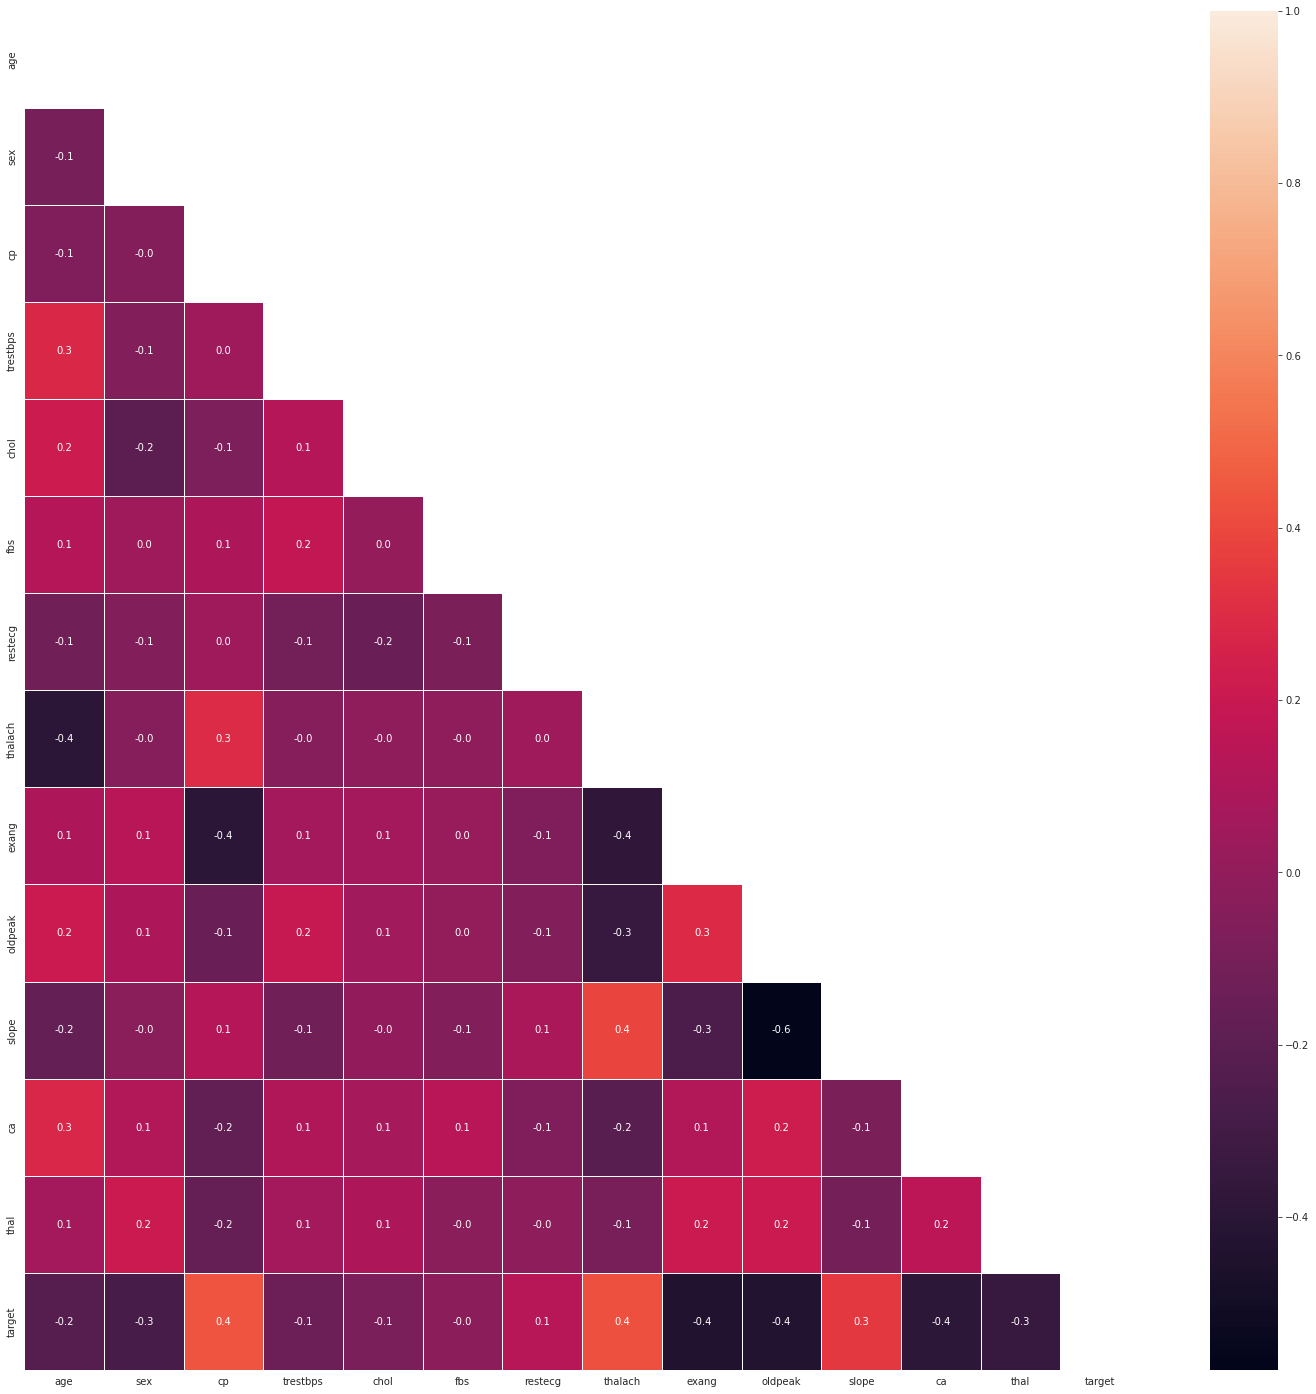

In [10]:
eda.corr_map(df)

In [8]:
y = df.target 
X = df.drop('target',axis = 1 )
X 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


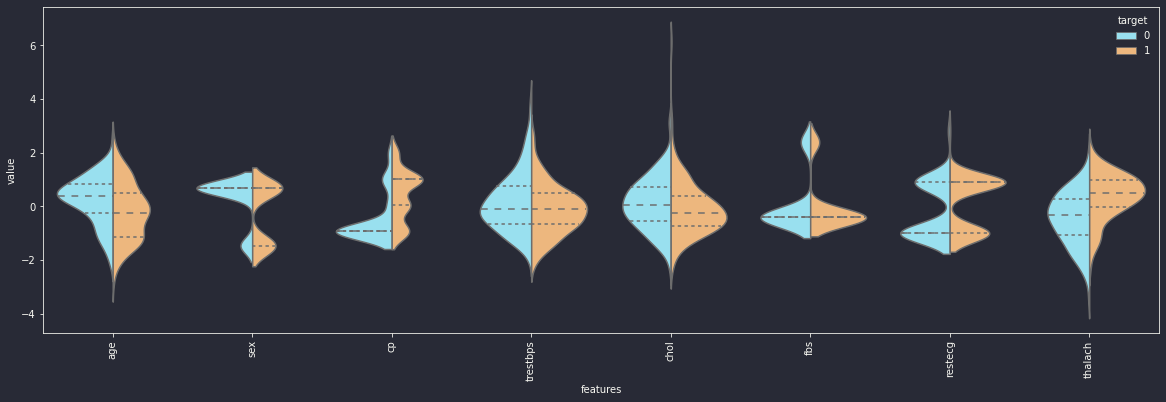

In [12]:
eda.voilin_plot(X,y, total_features_to_include=8)

In [9]:
#VIF 
fe = FeatureEngineering()
vif = fe.calculate_vif(X)
vif

,Features,VIF_Values
3,trestbps,58.557335
7,thalach,42.742178
0,age,38.998305
4,chol,26.267365
12,thal,17.165303
10,slope,10.072734
1,sex,3.523211
9,oldpeak,3.062890
2,cp,2.414403
6,restecg,2.058206


## Model Training And Evaluation 

In [111]:
most_import_features = fe.select_features(X, y, top_n_features=11).Columns.to_list()
len(most_import_features)

11

In [112]:
most_import_features

['thalach',
 'oldpeak',
 'ca',
 'cp',
 'exang',
 'chol',
 'age',
 'trestbps',
 'slope',
 'sex',
 'thal']

In [113]:
X_train, X_test, y_train,  y_test = train_test_split(X[most_import_features], y, test_size=0.15, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((257, 11), (257,), (46, 11), (46,))

In [114]:
training = ModelTraining()

C:\Users\92304\anaconda3\envs\complete-healthcare\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\92304\anaconda3\envs\complete-healthcare\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:34:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 1.69 s


<AxesSubplot:>

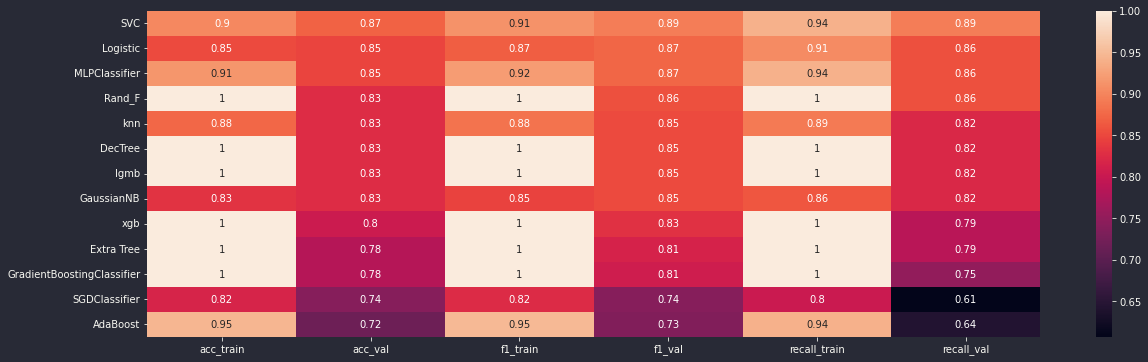

In [126]:
%%time
models = {
          'knn' : KNeighborsClassifier(),
          'Logistic': LogisticRegression(),
          'AdaBoost' : AdaBoostClassifier(),
          'DecTree': DecisionTreeClassifier(),
          'MLPClassifier' : MLPClassifier(),
          'lgmb' : lgbm.LGBMClassifier(),
          'xgb' : XGBClassifier(objective='binary:logistic'),
          'SGDClassifier' : SGDClassifier(),
          'GaussianNB' : GaussianNB(),
          #'MultinomialNB': MultinomialNB(),
          'GradientBoostingClassifier' : GradientBoostingClassifier(),
          'SVC' : SVC(),
          'Extra Tree' : ExtraTreesClassifier(),
          'Rand_F' : RandomForestClassifier()
         }
sns.heatmap(training.compare_base_classifiers(models, X_train=X_train, y_train=y_train, X_val=X_test , y_val=y_test,
                                              imputer= SimpleImputer(missing_values= np.nan, strategy='mean'), scaler=StandardScaler(), 
                                              poly = PolynomialFeatures(degree=1, include_bias = True),
                                              cols_to_impute=X_train.columns, sort_by='f1_val'), annot=True);

In [43]:
model_finder = Model_Finder()

#### Hyperparameter tuning of 3 top performing models

In [129]:
#Support Vector Classifier
param_grid = {'C': [0.1,0.5,1,1.5,2,10, 100], 'gamma': [1,0.1,0.5,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
CV_sv = GridSearchCV(estimator= SVC() , param_grid=param_grid, cv= 8, verbose=2, scoring='accuracy')
pipe = Pipeline([
    ('imputer', SimpleImputer(missing_values= np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=1, include_bias = True)),
    ('classifier', CV_sv)
])
pipe_sv = pipe.fit(X_train, y_train)
print(f"Best Parameters : {pipe_sv.named_steps['classifier'].best_params_} ----- Best Score : {pipe_sv.named_steps['classifier'].best_score_}" )

Fitting 8 folds for each of 105 candidates, totalling 840 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=

[CV] END ........................C=0.5, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.5, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.5, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.5, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.5, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.5, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.5, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ...................

[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END .......................C=1.5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1.5, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=1.5, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=1.5, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=1.5, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=1.5, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=1.5, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=1.5, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ........................C=2, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=2, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=2, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=2, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=2, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .....................C=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................

[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=100, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=100, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=100, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=100, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=100, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=100, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=100, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=100, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ...................

[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
Best Parameters : {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'} ----- Best Score : 0.8364109848484849


0.8695652173913043
0.8928571428571429


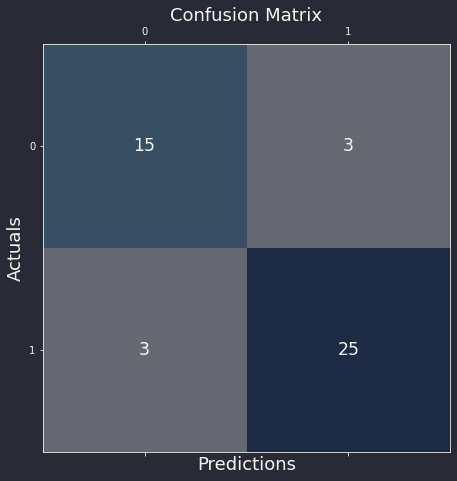

In [137]:
pipe = Pipeline([
    ('imputer', SimpleImputer(missing_values= np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=1, include_bias = True)),
    ('classifier', SVC(C=1, gamma =0.01, kernel='rbf'))
])
pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))
print(f1_score(y_test, pipe.predict(X_test)))
training.plot_cm(y_val = y_test, y_predicted = pipe.predict(X_test))

In [148]:
#hyperparameter tuning LogisticRegression
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'] ,'C': [100, 10, 1.0, 1.5, 0.01, 0.1]}
CV_lr = GridSearchCV(estimator= LogisticRegression() , param_grid=param_grid, cv= 5, verbose=2, scoring='accuracy')
pipe = Pipeline([
    ('imputer', SimpleImputer(missing_values= np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=1, include_bias = True)),
    ('classifier', CV_lr)
])
pipe_lr = pipe.fit(X_train, y_train)
print(f"Best Parameters : {pipe_lr.named_steps['classifier'].best_params_} ----- Best Score : {pipe_lr.named_steps['classifier'].best_score_}" )

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ............................C=100, solver=newton-cg; total time=   0.0s
[CV] END ............................C=100, solver=newton-cg; total time=   0.0s
[CV] END ............................C=100, solver=newton-cg; total time=   0.0s
[CV] END ............................C=100, solver=newton-cg; total time=   0.0s
[CV] END ............................C=100, solver=newton-cg; total time=   0.0s
[CV] END ................................C=100, solver=lbfgs; total time=   0.0s
[CV] END ................................C=100, solver=lbfgs; total time=   0.0s
[CV] END ................................C=100, solver=lbfgs; total time=   0.0s
[CV] END ................................C=100, solver=lbfgs; total time=   0.0s
[CV] END ................................C=100, solver=lbfgs; total time=   0.0s
[CV] END ............................C=100, solver=liblinear; total time=   0.0s
[CV] END ............................C=100, solv

0.8695652173913043
0.8928571428571429


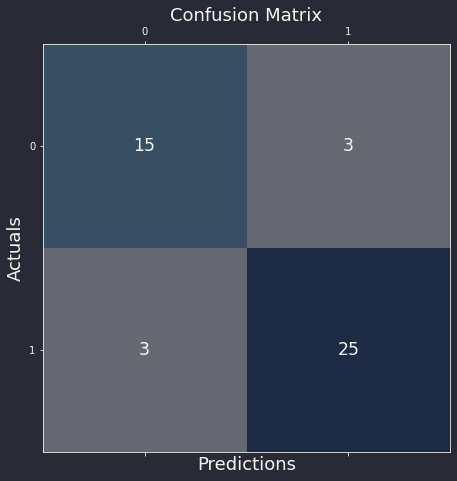

In [150]:
pipe = Pipeline([
    ('imputer', SimpleImputer(missing_values= np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=1, include_bias = True)),
    ('classifier', LogisticRegression(C=0.01, solver='liblinear'))
])
pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))
print(f1_score(y_test, pipe.predict(X_test)))
training.plot_cm(y_val = y_test, y_predicted = pipe.predict(X_test))

In [153]:
#hyperparameter tuning MLPClassifier
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
CV_MLP = GridSearchCV(estimator= MLPClassifier(max_iter=1000) , param_grid=param_grid, cv= 5, verbose=2, scoring='accuracy')
pipe = Pipeline([
    ('imputer', SimpleImputer(missing_values= np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=1, include_bias = True)),
    ('classifier', CV_MLP)
])
pipe_MLP = pipe.fit(X_train, y_train)
print(f"Best Parameters : {pipe_MLP.named_steps['classifier'].best_params_} ----- Best Score : {pipe_MLP.named_steps['classifier'].best_score_}" )

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   1.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   1.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   1.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   1.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=   0.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, 

[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=   0.6s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd; total time=   2.2s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd; total time=   2.2s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd; total 

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd; total time=   3.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd; total time=   4.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd; total time=   4.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd; total time=   5.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   2.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   1.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solv

[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   2.0s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, solver=sgd; total time=   2.7s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, solver=sgd; total time=   3.4s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, solver=sgd; total time=   1.4s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, solver=sgd; tot

C:\Users\92304\anaconda3\envs\complete-healthcare\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8260869565217391
0.8518518518518519


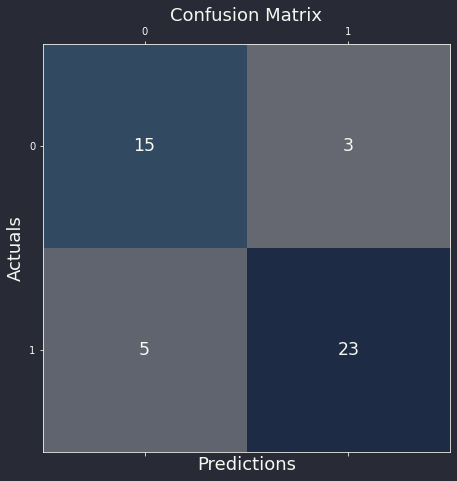

In [159]:
pipe = Pipeline([
    ('imputer', SimpleImputer(missing_values= np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=1, include_bias = True)),
    ('classifier', MLPClassifier(activation = 'tanh', alpha = 0.05, hidden_layer_sizes = (50, 100, 50), learning_rate = 'constant', solver = 'adam'))
])
pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))
print(f1_score(y_test, pipe.predict(X_test)))
training.plot_cm(y_val = y_test, y_predicted = pipe.predict(X_test))

C:\Users\92304\anaconda3\envs\complete-healthcare\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\92304\anaconda3\envs\complete-healthcare\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:47:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8695652173913043
0.8928571428571429


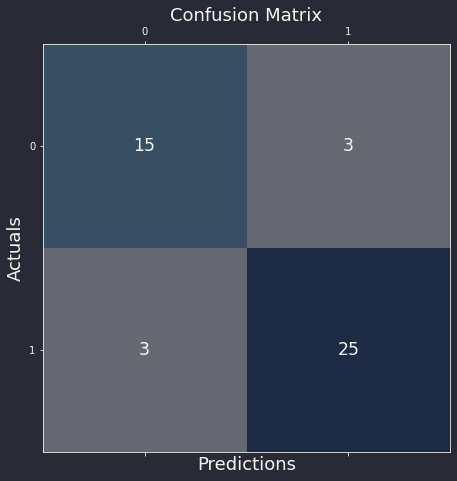

In [167]:
##VotingClassifier
import lightgbm as lgbm
svc = SVC(C=1, gamma =0.01, kernel='rbf')
lr = LogisticRegression(C=0.01, solver='liblinear')
mlp = MLPClassifier(activation = 'tanh', alpha = 0.05, hidden_layer_sizes = (50, 100, 50), learning_rate = 'constant', solver = 'adam')
xgb = XGBClassifier()
gb = GradientBoostingClassifier()
rfc = RandomForestClassifier()
lgbm = lgbm.LGBMClassifier()

voting_clf = VotingClassifier([('scv', svc),('lr',lr),('mlp', mlp), ('rfc', rfc),('lgbm',lgbm), ('gb',gb), ('xgb',xgb)],weights=[5,5,4,2,2,2,2])

pipe = Pipeline([
    ('imputer', SimpleImputer(missing_values= np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=1, include_bias = True)),
    ('classifier', voting_clf)
])

pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))
print(f1_score(y_test, pipe.predict(X_test)))
training.plot_cm(y_val = y_test, y_predicted = pipe.predict(X_test))

C:\Users\92304\anaconda3\envs\complete-healthcare\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8695652173913043
0.8928571428571429


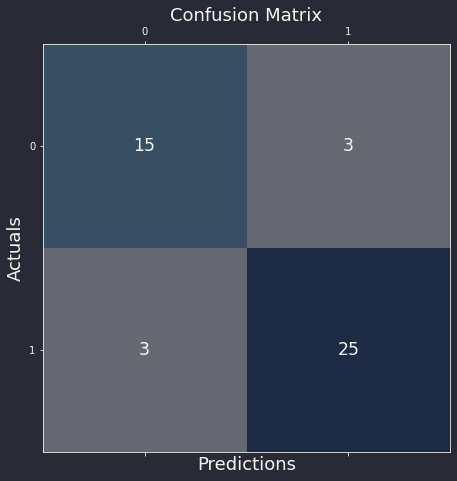

In [170]:
import lightgbm as lgbm
#StackingClassifier
estimators = [
    ('svc' , SVC(C=1, gamma =0.01, kernel='rbf')),
    ('lr' , LogisticRegression(C=0.01, solver='liblinear')),
    ('mlp' , MLPClassifier(activation = 'tanh', alpha = 0.05, hidden_layer_sizes = (50, 100, 50), learning_rate = 'constant', solver = 'adam'),
    ('xgb' , XGBClassifier()),
    ('gb' , GradientBoostingClassifier()),
    ( 'lgbm' , lgbm.LGBMClassifier()))
    
    ]

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

pipe = Pipeline([
    ('imputer', SimpleImputer(missing_values= np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=1, include_bias = True)),
    ('classifier', stacking_clf)
])

pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))
print(f1_score(y_test, pipe.predict(X_test)))
training.plot_cm(y_val = y_test, y_predicted = pipe.predict(X_test))

C:\Users\92304\anaconda3\envs\complete-healthcare\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:05:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\92304\anaconda3\envs\complete-healthcare\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\92304\anaconda3\envs\complete-healthcare\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:05:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\92304\anaconda3\envs\complete-healthcare\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Wall time: 13.8 s


<AxesSubplot:>

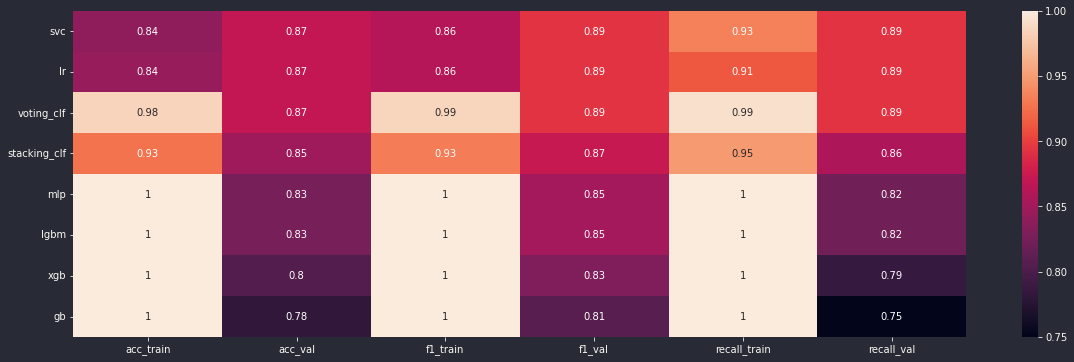

In [183]:
%%time 
models = {
     'svc' : SVC(C=1, gamma =0.01, kernel='rbf'),
    'lr' : LogisticRegression(C=0.01, solver='liblinear'),
    'mlp' : MLPClassifier(activation = 'tanh', alpha = 0.05, hidden_layer_sizes = (50, 100, 50), learning_rate = 'constant', solver = 'adam', max_iter=1000),
    'xgb' : XGBClassifier(),
    'gb' : GradientBoostingClassifier(),
    'lgbm' : lgbm.LGBMClassifier(),
    'voting_clf': voting_clf,
    'stacking_clf': stacking_clf
}
sns.heatmap(training.compare_base_classifiers(models, X_train=X_train, y_train=y_train, X_val=X_test , y_val=y_test,
                                              imputer= SimpleImputer(missing_values= np.nan, strategy='mean'), scaler=StandardScaler(), 
                                              poly = PolynomialFeatures(degree=1, include_bias = True),
                                              cols_to_impute=X_train.columns, sort_by='f1_val'), annot=True);

In [198]:
#Here AdaBoostClassifier outperforms all other classifiers , so I will go with that
#Training the model on complete dataset
X_complete = pd.concat([X_train, X_test], axis = 0)
y_complete = pd.concat([y_train, y_test], axis = 0)
X_complete.shape, y_complete.shape

((303, 11), (303,))

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=1)),
                ('classifier', LogisticRegression(C=0.01, solver='liblinear'))])
0.8695652173913043
0.8928571428571429


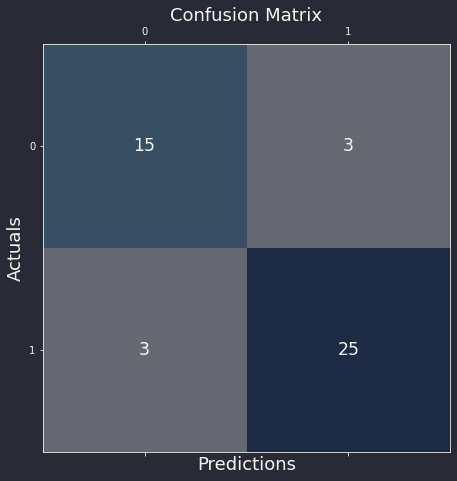

In [199]:
#final pipeline
pipe = Pipeline([
    ('imputer', SimpleImputer(missing_values= np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=1, include_bias = True)),
    ('classifier', LogisticRegression(C=0.01, solver='liblinear'))
])
pipe.fit(X_complete, y_complete)
with gzip.open('./models/heart_model.pickle.gz', 'wb') as f:
    pickle.dump(pipe, f)
with gzip.open('./models/heart_model.pickle.gz', 'rb') as f:
    loaded_pipeline = pickle.load(f)
print(loaded_pipeline)
print(loaded_pipeline.score(X_test, y_test))
print(f1_score(y_test, loaded_pipeline.predict(X_test)))
training.plot_cm(y_val = y_test, y_predicted = loaded_pipeline.predict(X_test))

In [1]:
## RestAPI
import requests
res = requests.post('https://complete-healthcare.herokuapp.com/predict_heart', json={"values" : ["146","2.8","2","0","1","224","58","170","1","0","1"]})
if res.ok:
    print(res.text) #For text out put .json could be used to value output

No need to worry, as your probability of getting the disease is 32.4% which is less than 50%


In [202]:
loaded_pipeline.predict(X_complete)

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [224]:
(loaded_pipeline.predict_proba(X_complete[2:3])[0])*100

array([67.61691919, 32.38308081])

In [212]:
X_complete

,thalach,oldpeak,ca,cp,exang,chol,age,trestbps,slope,sex,thal
281,156,1.0,0,0,1,204,52,128,1,1,0
78,184,0.0,0,1,0,205,52,128,2,1,2
292,146,2.8,2,0,1,225,58,170,1,0,1
232,145,0.8,1,0,1,289,55,160,1,1,3
219,150,0.0,2,0,1,256,48,130,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...
77,164,0.0,0,1,1,221,59,140,2,1,2
137,140,0.0,0,1,0,208,62,128,2,1,2
116,168,2.0,0,2,0,214,41,130,1,1,2
7,173,0.0,0,1,0,263,44,120,2,1,3
